In [1]:
import glob
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout 
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
###Reading the source files

covid = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob("E:\\COVID-19_Radiography_Dataset\COVID\images\*.png")] 

viral = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob("E:\\COVID-19_Radiography_Dataset\Viral Pneumonia\images\*.png")]

normal = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob("E:\\COVID-19_Radiography_Dataset\\Normal\images\*.png")]

lung = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob("E:\\COVID-19_Radiography_Dataset\Lung_Opacity\images\*.png")]


In [3]:
covid_path = "E:\\COVID-19_Radiography_Dataset\COVID\images\*.png"

In [4]:
import cv2
import glob

In [5]:
### Randomly sampling 1000 records
normal_2 = random.sample(normal, 1000)
lung_2 = random.sample(lung, 1000)
viral_2 = random.sample(viral, 1000)
covid_2 = random.sample(covid, 1000)

In [6]:
### Adding labels

covid_labels = [0] * len(covid_2)
lung_labels = [1] * len(lung_2)
normal_labels = [2] * len(normal_2)
viral_labels = [3] * len(viral_2)
final_labels = covid_labels + lung_labels + normal_labels + viral_labels



In [7]:
### Splitting train and test labels
train_labels = np.array(final_labels[0:3500])
test_labels = np.array(final_labels[3500:len(final_labels)])


In [8]:
test_labels.shape


(500,)

In [9]:
final_dataset_obs = covid_2 + lung_2 + normal_2 + viral_2

### Splitting train and test input images
train_data = final_dataset_obs[0:3500]
test_data = final_dataset_obs[3500:len(final_dataset_obs)]



In [10]:
train_data_final = np.array(train_data)
train_data_final.shape


(3500, 299, 299)

In [11]:
test_data_final = np.array(test_data)
test_data_final.shape


(500, 299, 299)

In [12]:
train_images = train_data_final.reshape(3500, 299, 299, 1)
train_images = train_images.astype('float32') / 255
test_images = test_data_final.reshape(500, 299, 299, 1)
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [13]:
print("Shape of X_train: {}".format(train_images.shape))
print("Shape of y_train: {}".format(train_labels.shape))
print("Shape of X_test: {}".format(test_images.shape))
print("Shape of y_test: {}".format(test_labels.shape))


Shape of X_train: (3500, 299, 299, 1)
Shape of y_train: (3500, 4)
Shape of X_test: (500, 299, 299, 1)
Shape of y_test: (500, 4)


In [14]:
X_train = train_images 
y_train = train_labels 
X_test = test_images 
y_test = test_labels 

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(299, 299, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=6)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 295, 295, 64)      0         
                                                                 
 flatten (Flatten)           (None, 5569600)           0         
                                                                 
 dense (Dense)               (None, 4)                 22278404  
                                                                 
Total params: 22,297,220
Trainable params: 22,297,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
110/110 [=========================

In [16]:
print("Loss: ", model.evaluate (X_test, y_test) [0])
print("Accuracy: ", model.evaluate (X_test, y_test) [1] * 100, "%")


16/16 [==============================] - 22s 1s/step - loss: 0.3349 - accuracy: 0.9220
Loss:  0.33489468693733215
16/16 [==============================] - 22s 1s/step - loss: 0.3349 - accuracy: 0.9220
Accuracy:  92.1999990940094 %


In [17]:
from matplotlib import pyplot as plt


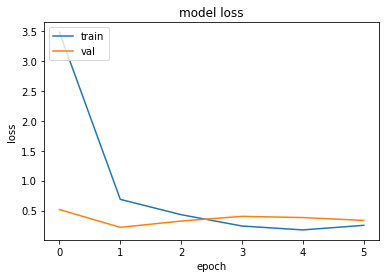

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

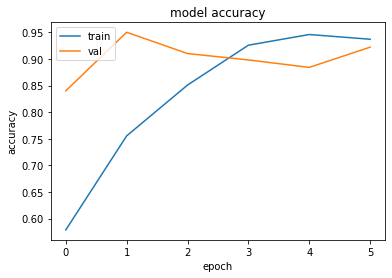

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()